# <span style="color:blue">Explainable AI in Natural Language Processing - Preprocessing Notebook</span>

## Welcome to the 1st Python notebook which covers the dataset analysis & preprocessing

Dataset: [Kaggle Twitter Hatespeech Dataset](https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech)

Author: Amir Mozahebi <br>
Thesis: Analysis of Explainable AI methods in Natural Language Processing 

Notebook Agenda:
1. Load & analyze Dataset
2. Preprocessing <br>
    2.1 Data cleansing using regex <br>
    2.2 Stopwords removal <br>
    2.3 Tokenization
3. Save preprocessed dataset

## 1. Load & analyze dataset

In the beginning we need to load our dataset inside the notebook <br>
and perform some analysis on our data before we start with <br>
the preprocessing

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re 
import string

In [2]:
#Load the training data
df = pd.read_csv("../data/train.csv")

In [3]:
#Show number of labeled tweets inside the dataset
len(df)

31962

In [4]:
#Show the first 10 entries of the dataset -> Label - 0 = No Hatespeech, Label - 1 = Hatespeech is contained 
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
# Show the first 5 Sentences in full
for i in range(0,20):
    print(df["tweet"][i])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
  bihday your majesty
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
 factsguide: society now    #motivation
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
 @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl
we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
 @user @user welcome here !  i'm   it's so #gr8 ! 
 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
we are so selfish. #orlando #standwith

In [6]:
#Show distribution of labels
df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

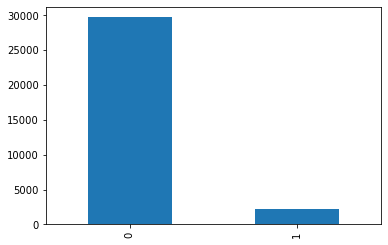

<Figure size 2400x1800 with 0 Axes>

In [7]:
#Show the distribution of labels as bar chart
df["label"].value_counts().plot(kind="bar")
figure(figsize=(8, 6), dpi=300)
plt.show()

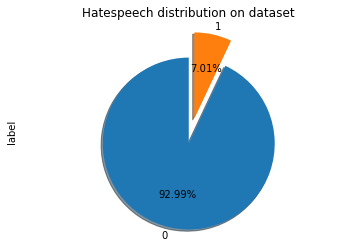

<Figure size 2400x1800 with 0 Axes>

In [8]:
#Show the distribution of labels as pie chart
df["label"].value_counts().plot.pie(startangle=90, shadow=True,explode=(0.2, 0.1), autopct='%1.2f%%')
plt.title('Hatespeech distribution on dataset')
plt.axis('equal')
figure(figsize=(8, 6), dpi=300)
plt.show()

In [9]:
#Count word appearance
from collections import Counter

def countAppearance(tweets):
    counter = Counter()
    for tweet in tweets:
        for word in tweet.split():
            counter[word] += 1
    return counter
    

In [10]:
wordCounter = countAppearance(df["tweet"])


In [11]:
len(wordCounter)

67223

In [12]:
wordCounter

Counter({'@user': 17291,
         'when': 1233,
         'a': 6261,
         'father': 108,
         'is': 4102,
         'dysfunctional': 1,
         'and': 4831,
         'so': 1889,
         'selfish': 4,
         'he': 485,
         'drags': 4,
         'his': 499,
         'kids': 122,
         'into': 199,
         'dysfunction.': 2,
         '#run': 33,
         'thanks': 254,
         'for': 4435,
         '#lyft': 2,
         'credit': 11,
         'i': 5655,
         "can't": 727,
         'use': 103,
         'cause': 64,
         'they': 704,
         "don't": 624,
         'offer': 21,
         'wheelchair': 2,
         'vans': 1,
         'in': 4570,
         'pdx.': 1,
         '#disapointed': 1,
         '#getthanked': 2,
         'bihday': 504,
         'your': 1671,
         'majesty': 5,
         '#model': 361,
         'love': 1112,
         'u': 1116,
         'take': 606,
         'with': 2482,
         'all': 1823,
         'the': 10065,
         'time': 918,
   

In [13]:
wordCounter.most_common(5)

[('@user', 17291), ('the', 10065), ('to', 9768), ('a', 6261), ('i', 5655)]

<BarContainer object of 5 artists>

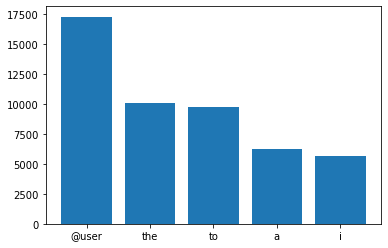

In [14]:
y = [count for tag, count in wordCounter.most_common(5)]
x = [tag for tag, count in wordCounter.most_common(5)]
plt.bar(x, y)

In [15]:
#Import wordcloud and wordcloud function
from wordcloud import WordCloud

def generateWordCloud(tweets):
    wordcloud = WordCloud(width=1400, height=600, background_color="white").generate(tweets)
    return wordcloud

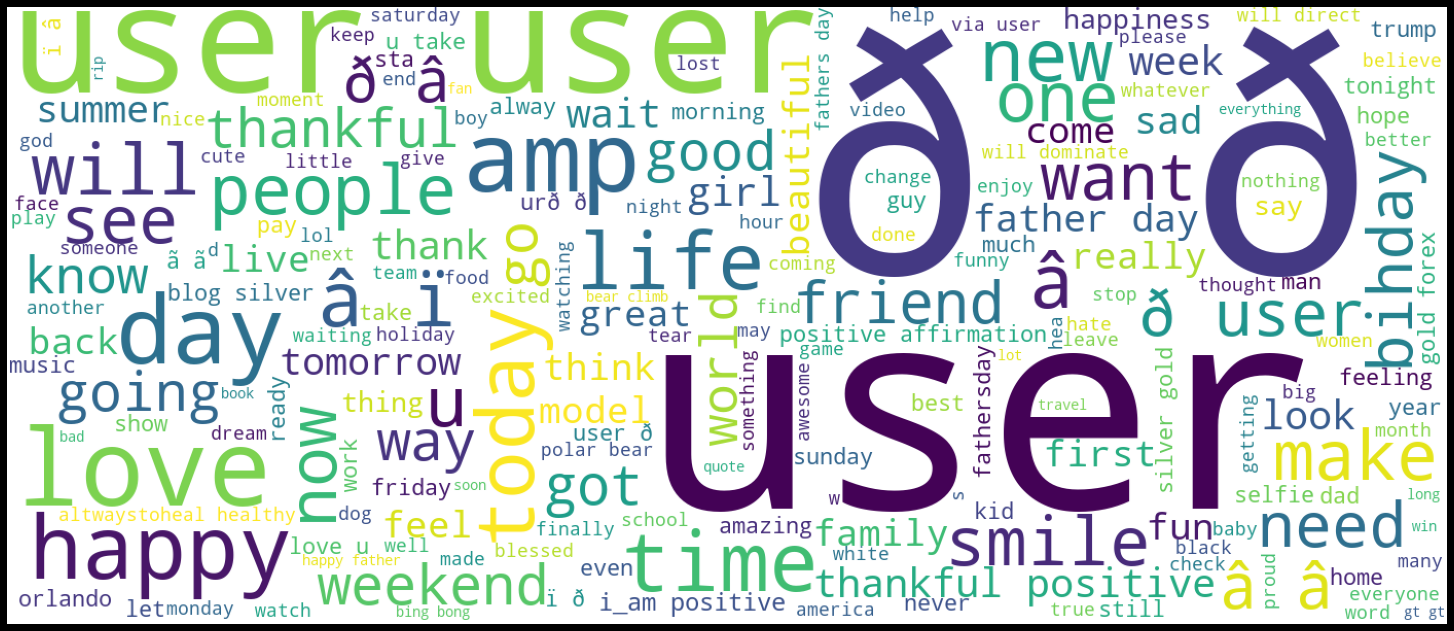

In [16]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 2. Preprocessing

Now that we have loaded the dataset we need to perform some data preprocessing. <br>
Cleaning up the data will make our later rnn models (RNN, LSTM, GRU) perform better <br>

We will perform the following preprocessing steps: <br>

- Remove ...
- Tokenization
- Lemminization


### 2.1 Remove 

In [17]:
#Preprocessing - Remove hashtag symbols
def removeHashtags(tweet):
  tweet = re.sub(r'#', '', tweet)
  return tweet

In [18]:
#Preprocessing - Remove user mentions
def removeUsers(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
  return tweet

In [19]:
#Preprocessing - Remove URLs
def removeLinks(tweet):
  tweet = re.sub(r'https?:\/\/\S+', '', tweet)
  return tweet

In [20]:
#Preprocessing - Remove punctuation
def removePunctuation(tweet):
  tweet = tweet.translate(str.maketrans('', '', string.punctuation))
  return tweet

In [21]:
#Preprocessing - Put all characters to lower case
def lowerCase(tweet):
    tweet = tweet.lower()
    return tweet

In [22]:
#Preprocessing - Remove non aplhabet values (e.g. Numbers, Icons, etc.) from tweets
def removeNonAlphabetChars(tweet):
    tweet = re.sub("[^A-Za-z]"," ", tweet)
    return tweet

In [23]:
#Preprocessing - Remove retweet symbols (Usually in twitter retweets are marked with 'RT')
def removeRetweets(tweet):
    tweet =re.sub(r'RT[\s]+', '', tweet)
    return tweet

In [24]:
#Preprocessing function - Holds all previous defined preprocessing functions in one
def cleanTweets(tweet):
    tweet = removeHashtags(tweet)
    tweet = removeUsers(tweet)
    tweet = removeLinks(tweet)
    tweet = removePunctuation(tweet)
    tweet = lowerCase(tweet)
    tweet = removeNonAlphabetChars(tweet)
    tweet = removeRetweets(tweet)
    return tweet

In [25]:
#Perform the preprocessing function on the twitter dataset
df["tweet"] = df["tweet"].apply(cleanTweets)

In [26]:
#Show first 10 rows after preprocessing
df.head(10)

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
5,6,0,huge fan fare and big talking before they l...
6,7,0,camping tomorrow danny
7,8,0,the next school year is the year for exams ...
8,9,0,we won love the land allin cavs champions clev...
9,10,0,welcome here im its so gr


In [27]:
# Show the first 5 Sentences in full
for i in range(0,20):
    print(df["tweet"][i])

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run
  thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked
  bihday your majesty
model   i love u take with u all the time in ur                                   
 factsguide society now    motivation
   huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo  
  camping tomorrow        danny   
the next school year is the year for exams     cant think about that      school exams   hate imagine actorslife revolutionschool girl
we won love the land allin cavs champions cleveland clevelandcavaliers      
   welcome here   im   its so gr   
     ireland consumer price index mom climbed from previous    to    in may   blog silver gold forex
we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 
i get to see my daddy today     days

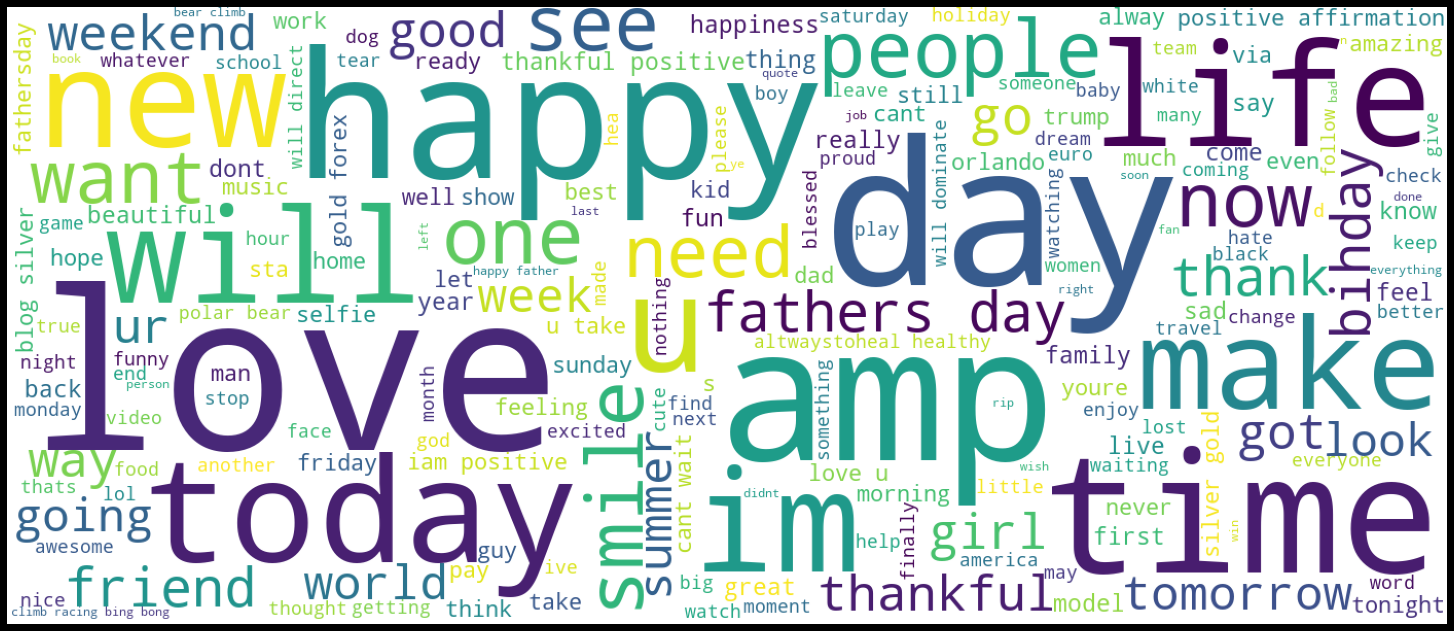

In [28]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.2 Stopwords Removal

In [29]:
#Import nltk library to retrieve a list of all stopwords in english
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

preprocessing_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(len(preprocessing_stopwords))
preprocessing_stopwords

179


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [31]:
additionalStopwords = ['rt', 'rts', 'retweet', "amp", "u", "im"]
preprocessing_stopwords = set().union(preprocessing_stopwords, additionalStopwords)

In [32]:
#Remove stopwords function
def removeStopwords(tweet):
    filtered = [word for word in tweet.split() if word not in preprocessing_stopwords]
    return " ".join(filtered)

In [33]:
df["tweet"] = df["tweet"].apply(removeStopwords)

In [34]:
df.head(10)

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty
3,4,0,model love take time ur
4,5,0,factsguide society motivation
5,6,0,huge fan fare big talking leave chaos pay disp...
6,7,0,camping tomorrow danny
7,8,0,next school year year exams cant think school ...
8,9,0,love land allin cavs champions cleveland cleve...
9,10,0,welcome gr


In [35]:
df.tweet

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit cant use cause dont offer w...
2                                           bihday majesty
3                                  model love take time ur
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: tweet, Length: 31962, dtype: object

In [36]:
wordCounter = countAppearance(df["tweet"])

In [37]:
len(wordCounter)

39358

In [38]:
wordCounter

Counter({'father': 216,
         'dysfunctional': 1,
         'selfish': 10,
         'drags': 4,
         'kids': 204,
         'dysfunction': 3,
         'run': 108,
         'thanks': 304,
         'lyft': 5,
         'credit': 15,
         'cant': 804,
         'use': 115,
         'cause': 73,
         'dont': 723,
         'offer': 27,
         'wheelchair': 3,
         'vans': 2,
         'pdx': 3,
         'disapointed': 1,
         'getthanked': 2,
         'bihday': 860,
         'majesty': 10,
         'model': 373,
         'love': 2738,
         'take': 622,
         'time': 1128,
         'ur': 454,
         'factsguide': 12,
         'society': 25,
         'motivation': 175,
         'huge': 44,
         'fan': 67,
         'fare': 4,
         'big': 199,
         'talking': 66,
         'leave': 136,
         'chaos': 8,
         'pay': 273,
         'disputes': 1,
         'get': 920,
         'allshowandnogo': 1,
         'camping': 18,
         'tomorrow': 430,
    

In [39]:
wordCounter.most_common(10)

[('love', 2738),
 ('day', 2300),
 ('happy', 1698),
 ('like', 1157),
 ('life', 1136),
 ('time', 1128),
 ('today', 1013),
 ('new', 989),
 ('positive', 934),
 ('thankful', 925)]

<BarContainer object of 10 artists>

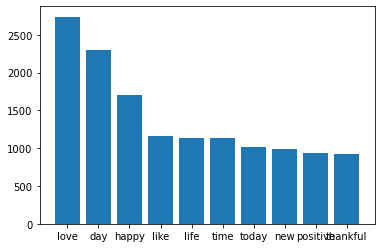

In [40]:
y = [count for tag, count in wordCounter.most_common(10)]
x = [tag for tag, count in wordCounter.most_common(10)]
plt.bar(x, y)

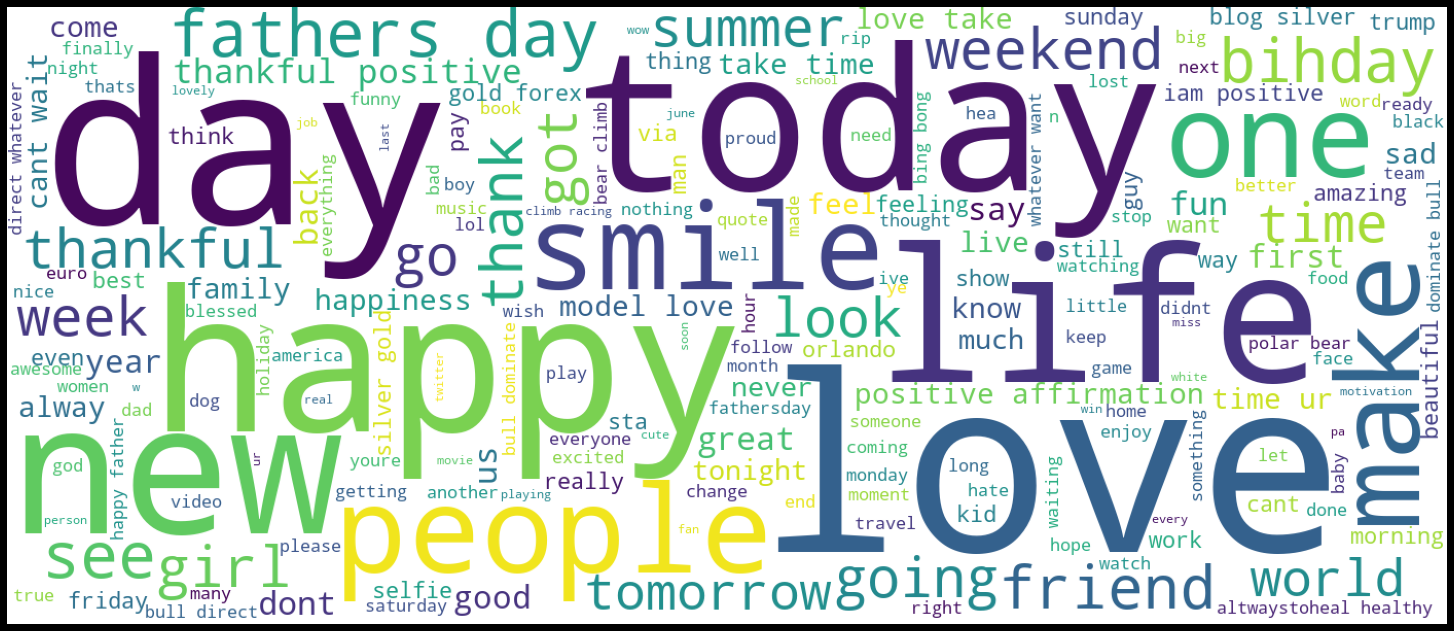

In [41]:
#Generate a wordcloud
wordcloud = generateWordCloud(' '.join(df['tweet']))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [42]:
#Get the number of unique words before tokenization & lemmatization
numWords = len(wordCounter)

## Split dataset into training and test set

In [43]:
trainSize = int(df.shape[0] * 0.8)

trainSet = df[:trainSize]
testSet = df[trainSize:]

trainTweets = trainSet.tweet
trainLabels = trainSet.label
testTweets = testSet.tweet
testLabels = testSet.label

In [44]:
trainSet["label"].value_counts()

0    23771
1     1798
Name: label, dtype: int64

In [45]:
testSet["label"].value_counts()

0    5949
1     444
Name: label, dtype: int64

### 2.2 Tokenization

In [46]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
trainTweets.shape, testTweets.shape

((25569,), (6393,))

In [48]:
trainWordTokens = [nltk.word_tokenize(tweet) for tweet in trainTweets]
testWordTokens = [nltk.word_tokenize(tweet) for tweet in testTweets]

In [49]:
trainWordTokens[0:5]

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  'cant',
  'use',
  'cause',
  'dont',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'take', 'time', 'ur'],
 ['factsguide', 'society', 'motivation']]

In [50]:
testWordTokens

[['together',
  'christmas',
  'pls',
  'follow',
  'national',
  'day',
  'action',
  'feb'],
 ['meet',
  'white',
  'nationalist',
  'movement',
  'favorite',
  'russian',
  'philosopher',
  'aleksandr',
  'dugin'],
 ['good',
  'night',
  'life',
  'love',
  'latepost',
  'goodnight',
  'tanjung',
  'lesung',
  'beach',
  'club'],
 ['see', 'tomorrow', 'lets', 'rock', 'show', 'time', 'lives'],
 ['gon',
  'na',
  'liei',
  'might',
  'get',
  'little',
  'teary',
  'eyed',
  'tomorrow',
  'andor',
  'monday',
  'th',
  'graders',
  'say',
  'goodbye',
  'stgrouphere'],
 ['getting',
  'slim',
  'day',
  'day',
  'looking',
  'attractive',
  'confident',
  'mee'],
 ['cause', 'today', 'belongs', 'us', 'one', 'miss'],
 ['hello',
  'epcot',
  'disney',
  'epcot',
  'usa',
  'hollydays',
  'world',
  'epcot',
  'walt',
  'disney',
  'world'],
 ['haford',
  'buffalo',
  'simulation',
  'buffalo',
  'take',
  'vicinity',
  'homes',
  'way'],
 ['sikh', 'temple', 'vandalised', 'calgary', 'wso', 

### Add Lemminization before creating word index and after Tokenization


In [66]:
#Download NLTK dependencies for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amirmozahebi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [67]:
#Import and initialize Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [68]:
#Lemmatization Function
def lemmatizing(tweets):
    lemmatized_text = [lemmatizer.lemmatize(token) for token in tweets]
    return lemmatized_text

In [69]:
lemmatizedTrainTweets = [lemmatizing(tokens) for tokens in trainWordTokens]
lemmatizedTestTweets = [lemmatizing(tokens) for tokens in testWordTokens]

In [70]:
print(trainTweets[0])
print(lemmatizedTrainTweets[0])
print(lemmatizedTestTweets[0])

father dysfunctional selfish drags kids dysfunction run
['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']
['together', 'christmas', 'pls', 'follow', 'national', 'day', 'action', 'feb']


### Create a word index & Text to sequences

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
tokenizer = Tokenizer(num_words=numWords, oov_token = "<OOV>" )
tokenizer.fit_on_texts(lemmatizedTrainTweets)

In [73]:
word_index = tokenizer.word_index

In [74]:
word_index

{'<OOV>': 1,
 'love': 2,
 'day': 3,
 'happy': 4,
 'life': 5,
 'like': 6,
 'time': 7,
 'today': 8,
 'new': 9,
 'positive': 10,
 'get': 11,
 'thankful': 12,
 'people': 13,
 'bihday': 14,
 'good': 15,
 'cant': 16,
 'one': 17,
 'see': 18,
 'dont': 19,
 'smile': 20,
 'fathers': 21,
 'go': 22,
 'want': 23,
 'work': 24,
 'take': 25,
 'healthy': 26,
 'weekend': 27,
 'fun': 28,
 'got': 29,
 'summer': 30,
 'make': 31,
 'friday': 32,
 'days': 33,
 'family': 34,
 'us': 35,
 'beautiful': 36,
 'way': 37,
 'going': 38,
 'best': 39,
 'bull': 40,
 'friends': 41,
 'need': 42,
 'great': 43,
 'first': 44,
 'wait': 45,
 'really': 46,
 'back': 47,
 'music': 48,
 'ur': 49,
 'know': 50,
 'morning': 51,
 'world': 52,
 'fathersday': 53,
 'tomorrow': 54,
 'sad': 55,
 'never': 56,
 'orlando': 57,
 'week': 58,
 'cute': 59,
 'think': 60,
 'trump': 61,
 'feel': 62,
 'happiness': 63,
 'blog': 64,
 'right': 65,
 'affirmation': 66,
 'much': 67,
 'home': 68,
 'night': 69,
 'model': 70,
 'sunday': 71,
 'well': 72,
 'foll

In [75]:
vocabSize = len(word_index) + 1

In [ ]:
vocabSize

In [76]:
#Apply tokenization on tweets of training and test dataset
trainSequences = tokenizer.texts_to_sequences(lemmatizedTrainTweets) 
testSequences = tokenizer.texts_to_sequences(lemmatizedTestTweets)

In [77]:
#Comparison of tweets before and after tokenization
print(lemmatizedTrainTweets[0])
print(trainSequences[0])
print(lemmatizedTestTweets[0])
print(testSequences[0])

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']
[147, 12788, 3096, 6319, 157, 6320, 377]
['together', 'christmas', 'pls', 'follow', 'national', 'day', 'action', 'feb']
[395, 1008, 1354, 73, 912, 3, 1000, 30860]


#### Apply Padding

In [78]:
#For later on training our RNN models (RNN, LSTM, GRU) require the
sequenceLength = 20

paddedTrainSequences = pad_sequences(trainSequences, maxlen=sequenceLength, padding="post", truncating="post")
paddedTestSequences = pad_sequences(testSequences, maxlen=sequenceLength, padding="post", truncating="post")

In [79]:
#Comparison of tweets before, after tokenization and after padding
print(paddedTrainSequences[0])
print(paddedTestSequences[0])

[  147 12788  3096  6319   157  6320   377     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[  395  1008  1354    73   912     3  1000 30860     0     0     0     0
     0     0     0     0     0     0     0     0]


## 3. Store variables to be processed in the upcoming notebooks (LSTM, RNN & GRU Training)

In [80]:
%store sequenceLength
%store vocabSize
%store paddedTrainSequences
%store trainLabels
%store paddedTestSequences
%store testLabels
%store tokenizer

Stored 'sequenceLength' (int)
Stored 'vocabSize' (int)
Stored 'paddedTrainSequences' (ndarray)
Stored 'trainLabels' (Series)
Stored 'paddedTestSequences' (ndarray)
Stored 'testLabels' (Series)
Stored 'tokenizer' (Tokenizer)
